# Airbnb Prices in European Cities analysis
This notebook is a data analysis on the Airbnb prices in the following European cities; Amsterdam, Athens, Barcelona, Berlin, Budapest, Lisbon, London, Paris, Rome & Vienna.



## Scope of the Project
This project will initially be divided in the following parts:

1. Initial data inspection (Descriptive Analyses, calculating desired summary statistics)
2. Analyze spatial trends in Airbnb prices across Europe and finding the most favorable cities for hosting
3. Compare differences between weekdays and weekend booking patterns to project rental rates for vacationers and business travelers in European cities.
4. Using spatial econometrics methods to find important determinants of Airbnb prices in order to provide insights into areas of opportunity for improvement, or assess the effectiveness of existing policy changes concerning vacation rentals
5. Write down 5 things on how I will present this profesionally 
6. Write down a list of things I have learned in the Codecademy module and apply 4 of them
7. Make a Hexbin plot with marginal distributions of something
8. Make an overlapping densities ('ridge plot')
9. Make a dot plot with several variables (seaborn.pydata.org/examples/pairgrid_dotplot.html)

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
pallete = ['#E8E8E8', '#BFBFBF', '#96939B', '#564256', '#FC814A']

In [137]:
amsterdam_weekdays = pd.read_csv('amsterdam_weekdays.csv')
amsterdam_weekends = pd.read_csv('amsterdam_weekends.csv')
athens_weekdays = pd.read_csv('athens_weekdays.csv')
athens_weekends = pd.read_csv('athens_weekends.csv')
barcelona_weekdays = pd.read_csv('barcelona_weekdays.csv')
barcelona_weekends = pd.read_csv('barcelona_weekends.csv')
berlin_weekdays = pd.read_csv('berlin_weekdays.csv')
berlin_weekends = pd.read_csv('berlin_weekends.csv')
budapest_weekdays = pd.read_csv('budapest_weekdays.csv')
budapest_weekends = pd.read_csv('budapest_weekends.csv')
lisbon_weekdays = pd.read_csv('lisbon_weekdays.csv')
lisbon_weekends = pd.read_csv('lisbon_weekends.csv')
london_weekdays = pd.read_csv('london_weekdays.csv')
london_weekends = pd.read_csv('london_weekends.csv')
paris_weekdays = pd.read_csv('paris_weekdays.csv')
paris_weekends = pd.read_csv('paris_weekends.csv')
rome_weekdays = pd.read_csv('rome_weekdays.csv')
rome_weekends = pd.read_csv('rome_weekends.csv')
vienna_weekdays = pd.read_csv('vienna_weekdays.csv')
vienna_weekends = pd.read_csv('vienna_weekends.csv')


### Initial Data Inspection
1. List of all the features 
2. Mean of the prices compared for all cities
3. std of the prices compared for all cities


#### List of all the features of the dataset

the features of the datasets are as follows:
- realSum = The total price of the Airbnb listing
- room_type = The type of room being offered
- room_shared = Whether the room is shared or not
- room_private = Whether the room is private or not
- person_capacity = The maximum number of people that can stay in the room
- host_is_superhost = Whether the host is a superhost or not
- multi = Whether the listing is for multiple rooms or not
- biz = Whether the listing is for business purposes or not
- cleanliness_rating = The cleanliness rating of the listing
- guest_satisfaction_overall = The overall guest satisfaction rating of the listing
- bedrooms = The number of bedrooms in the listing
- dist = The distance from the city centre
- metro_dist = The distance from the nearest metro station
- lng = The longitude of the listing
- lat = The latitude of the listing


#### Comparison of the Prices in all the different cities

In the function below we combine the weekdays and the weekends of a particular city and also add a new column 'city', since we will be combining all the cities into one big dataset.

In [138]:
def combine(csv_1, col_1, csv_2, col_2, city):
    csv_1['week_time'] = col_1
    csv_2['week_time'] = col_2
    
    merged = pd.concat([csv_1, csv_2])
    merged['city'] = city
    return merged

In [139]:
amsterdam = combine(amsterdam_weekdays,'weekdays',amsterdam_weekends,'weekends','amsterdam')
athens = combine(athens_weekdays,'weekdays',athens_weekends,'weekends','athens')
barcelona = combine(barcelona_weekdays,'weekdays',barcelona_weekends,'weekends','barcelona')
berlin = combine(berlin_weekdays,'weekdays',berlin_weekends,'weekends','berlin')
budapest = combine(budapest_weekdays,'weekdays',budapest_weekends,'weekends','budapest')
lisbon = combine(lisbon_weekdays,'weekdays',lisbon_weekends,'weekends','lisbon')
london = combine(london_weekdays,'weekdays',london_weekends,'weekends','london')
paris = combine(paris_weekdays,'weekdays',paris_weekends,'weekends','paris')
rome = combine(rome_weekdays,'weekdays',rome_weekends,'weekends','rome')
vienna = combine(vienna_weekdays,'weekdays',vienna_weekends,'weekends','vienna')

In [182]:
cities = [amsterdam, athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna]

In [183]:
city_names = [city.city.unique()[0].capitalize() for city in cities]

In [184]:
europe_data = pd.concat(cities, ignore_index=True)

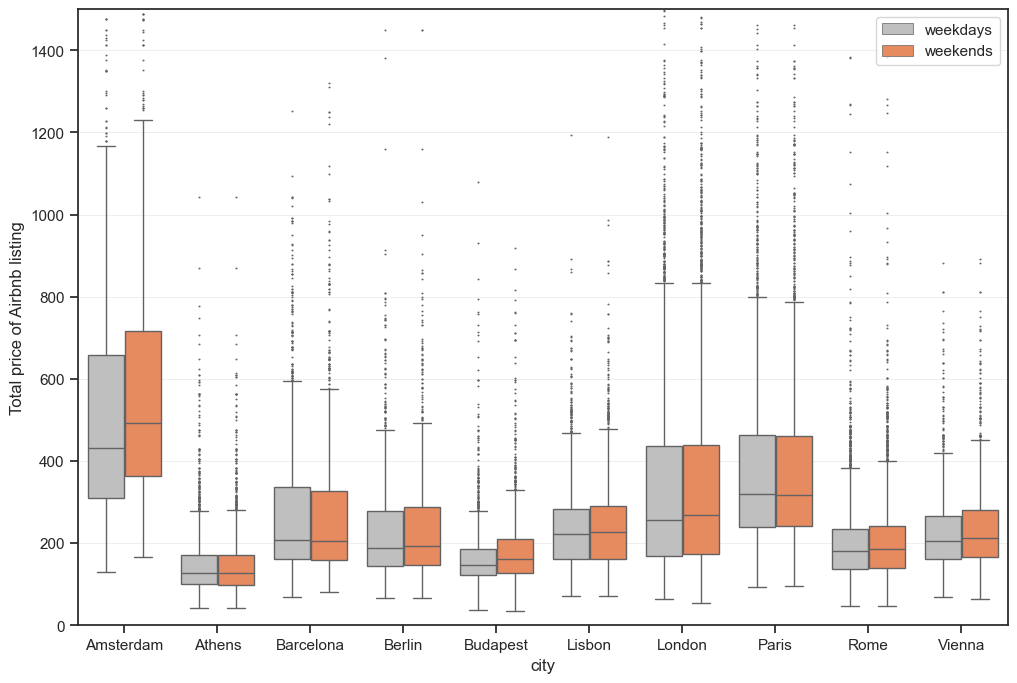

<Figure size 640x480 with 0 Axes>

In [187]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
plt.axis([0,8,0,1500])
sns.set_theme(style='ticks', palette='pastel')
sns.boxplot(x="city", y="realSum", hue="week_time", palette=['#BFBFBF', '#FC814A'], data=europe_data, fliersize=0.5, linewidth=1)
plt.ylabel('Total price of Airbnb listing')
ax.set_xticklabels(city_names)
plt.grid(axis='y', color='#E8E8E8', linestyle='-', linewidth=.5)
plt.legend(loc=1)
plt.show()
plt.clf()

Next = rank the boxplot
